**DATA EXPLORATION**

`fluencybank_labels.csv` is a dataset containing over 4k clips labeled with five event types including blocks, prolongations, sound repetitions, word repetitions, and interjections. Audio comes from public podcasts largely consisting of people who stutter interviewing other people who stutter.

**Source:** https://machinelearning.apple.com/research/stuttering-event-detection

**Dataset:** https://github.com/apple/ml-stuttering-events-dataset/

Each 3-second clip was annotated with the following labels by three annotators who were not clinicians but did have training on how to identify each type of stuttering event. Label files contain counts (out of three) corresponding to how many reviewers selected a given label. Multiple labels may be selected for a given clip.

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/apple/ml-stuttering-events-dataset/main/fluencybank_labels.csv')
print(df.sample(10)) 

print(df.shape) #dataset dimensions

             Show  EpId  ClipId     Start      Stop  Unsure  PoorAudioQuality  \
3294  FluencyBank   178     119   4958880   5006880       0                 0   
2459  FluencyBank   109      77   8383040   8431040       0                 0   
311   FluencyBank    19      30   4012960   4060960       0                 0   
3296  FluencyBank   178     121   5027680   5075680       0                 0   
346   FluencyBank    19      65  10397760  10445760       0                 0   
4104  FluencyBank   985     156  11162240  11210240       0                 0   
1146  FluencyBank    76      74   1328000   1376000       1                 0   
1865  FluencyBank    97      87   4993280   5041280       0                 0   
3326  FluencyBank   178     151   6405120   6453120       0                 0   
1110  FluencyBank    76      38    780960    828960       0                 0   

      Prolongation  Block  SoundRep  WordRep  DifficultToUnderstand  \
3294             1      0         0  

**Display columns in the dataset**

In [3]:
for col in df.columns:
    print(col)

Show
EpId
ClipId
Start
Stop
Unsure
PoorAudioQuality
Prolongation
Block
SoundRep
WordRep
DifficultToUnderstand
Interjection
NoStutteredWords
NaturalPause
Music
NoSpeech


**Stuttering event labels:**

- **Prolongation:** Elongated syllable (e.g., M[mmm]ommy)

- **Block:** Gasps for air or stuttered pauses

- **Sound Repetition:** Repeated syllables (e.g., I [pr-pr-pr-]prepared dinner)

- **Word Repetition:** The same word or phrase is repeated (e.g., I made [made] dinner)

- **No Stuttered Words:** Confirmation that none of the above is true.

- **Interjection:** Common filler words such as "um" or "uh" or person-specific filler words that individuals use to cope with their stutter (e.g., some users frequently say "you know" as a filler).

**Additional labels:**

- **Unsure:** An annotator selects this if they are not confident in their labeling.

- **Poor Audio Quality:** It is difficult to understand due to, for example, microphone quality.

- **Difficult To Understand:** It is difficult to understand the speech.

- **Natural Pause:** There is a pause in speech that is not considered a block or other disfluency.

- **Music:** There is background music playing (only in SEP-28k)

- **No Speech:** There is no speech in this clip. It is either silent or there is just background noise.

The variable `NoStutteredWords` is the confirmation for annotators that 

`Prolongation` AND `Block` AND `Sound Repetition` AND `Word Repetition` = FALSE 

(i.e) no stuttered words

In [4]:
print(df['NoStutteredWords'].value_counts())

3    1438
0    1270
2     804
1     632
Name: NoStutteredWords, dtype: int64


In [5]:
check_df = df[['Prolongation', 'Block', 'SoundRep', 'WordRep', 'NoStutteredWords']]
check_df.sample(10)

,Prolongation,Block,SoundRep,WordRep,NoStutteredWords
154,1,1,0,2,0
611,0,2,0,0,1
548,0,1,0,0,2
1686,0,0,0,0,3
3339,3,2,0,0,0
39,0,1,0,0,2
2039,2,2,0,0,0
483,0,0,0,0,3
826,0,0,0,0,3
3343,0,1,0,0,2


In [6]:
print(check_df[(check_df['NoStutteredWords'] == 3)])

      Prolongation  Block  SoundRep  WordRep  NoStutteredWords
1                0      0         0        0                 3
5                0      0         0        0                 3
6                0      0         0        0                 3
8                0      0         0        0                 3
9                0      0         0        0                 3
...            ...    ...       ...      ...               ...
4125             0      0         0        0                 3
4126             0      0         0        0                 3
4129             0      0         0        0                 3
4135             0      0         0        0                 3
4143             0      0         0        0                 3

[1438 rows x 5 columns]


There are **1438** reliable data points of individuals who **did not stammer**.

In [7]:
print(check_df[(check_df['NoStutteredWords'] == 0)])

      Prolongation  Block  SoundRep  WordRep  NoStutteredWords
4                0      0         0        3                 0
38               1      2         0        0                 0
75               0      3         0        1                 0
79               0      1         0        3                 0
82               0      1         1        2                 0
...            ...    ...       ...      ...               ...
4137             1      2         1        1                 0
4138             1      2         2        0                 0
4140             0      2         1        0                 0
4141             0      2         2        1                 0
4142             0      0         3        0                 0

[1270 rows x 5 columns]


There are **1270** reliable detection of individuals who displayed at least one characteristic of **stammering**.

In [8]:
print(df['Unsure'].value_counts())

0    3935
1     194
2      13
3       2
Name: Unsure, dtype: int64


We will only keep the most reliable data points for further analysis.

**DATA WRANGLING**

In [9]:
new_df = df.loc[(df['NoStutteredWords'] == 0) | (df['NoStutteredWords'] == 3)]
new_df.sample(10)

,Show,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,SoundRep,WordRep,DifficultToUnderstand,Interjection,NoStutteredWords,NaturalPause,Music,NoSpeech
840,FluencyBank,63,64,371680,419680,0,0,0,0,0,0,0,0,3,0,0,0
2861,FluencyBank,121,116,6469920,6517920,0,0,0,0,0,0,0,0,3,1,0,0
1838,FluencyBank,97,60,3416960,3464960,0,0,3,2,0,0,0,0,0,0,0,0
2293,FluencyBank,107,8,1150240,1198240,0,0,0,0,0,0,0,0,3,0,0,0
1377,FluencyBank,87,44,5053600,5101600,0,0,0,0,0,0,0,0,3,1,0,0
555,FluencyBank,24,185,11145600,11193600,0,0,0,0,0,0,0,0,3,0,0,0
3997,FluencyBank,985,49,406560,454560,0,0,1,2,1,0,2,0,0,0,0,0
3148,FluencyBank,173,52,2807360,2855360,0,0,1,1,1,3,0,0,0,0,0,0
2849,FluencyBank,121,104,5768960,5816960,0,0,0,0,0,0,0,2,3,0,0,0
2729,FluencyBank,118,97,10616480,10664480,0,0,1,1,1,0,1,0,0,0,0,0


In [10]:
print(new_df['NoStutteredWords'].value_counts())

3    1438
0    1270
Name: NoStutteredWords, dtype: int64


In [11]:
print(new_df.shape) #dataset dimensions
#1438 (reliable no stuttering data points) + 1270 (reliable stuttering data points) = 2708

(2708, 17)


**Deleting unnecessary features**




`Show` feature:

In [12]:
print(new_df['Show'].unique())

['FluencyBank']


We can delete this column as it does not hold any meaningful information.

In [13]:
del new_df['Show']

`Music` feature:

In [14]:
print(new_df['Music'].value_counts())

0    2708
Name: Music, dtype: int64


There are no entries in the dataset containing music and not speech. So, we can delete this column.

In [15]:
del new_df['Music']

`NoSpeech` feature:

In [16]:
print(new_df['NoSpeech'].value_counts())

0    2708
Name: NoSpeech, dtype: int64


All entries in this dataset contain speech. So, we can delete this column as well.

In [17]:
del new_df['NoSpeech']

In [18]:
new_df.sample(10)

,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,SoundRep,WordRep,DifficultToUnderstand,Interjection,NoStutteredWords,NaturalPause
3952,985,4,13834080,13882080,0,0,0,0,0,3,0,0,0,0
2739,118,107,10920960,10968960,0,0,0,0,0,0,1,0,3,0
2685,118,53,8683680,8731680,0,0,2,0,1,0,0,0,0,0
421,24,51,2792640,2840640,0,0,0,0,0,0,0,3,3,0
1212,81,44,33280,81280,0,0,0,0,3,0,0,1,0,0
947,63,171,11756960,11804960,0,0,0,0,0,0,0,0,3,0
3661,219,17,3201280,3249280,0,0,0,0,0,0,0,0,3,0
1176,81,8,8496000,8544000,0,0,0,0,0,3,0,0,0,0
937,63,161,10911520,10959520,0,0,0,0,0,0,0,0,3,0
774,46,125,769760,817760,0,0,0,0,0,0,0,0,3,0


The features `Poor Audio Quality` (difficulty in understanding due to, for example, microphone quality) & `Difficult To Understand` (difficulty in understanding speech of the individual)

In [19]:
print(new_df['PoorAudioQuality'].value_counts())

0    2708
Name: PoorAudioQuality, dtype: int64


All entries in this dataset contain good-quality audio data. So, we can delete this column as well.

In [20]:
del new_df['PoorAudioQuality']

In [21]:
new_df.sample(10)

,EpId,ClipId,Start,Stop,Unsure,Prolongation,Block,SoundRep,WordRep,DifficultToUnderstand,Interjection,NoStutteredWords,NaturalPause
1818,97,40,1767680,1815680,0,0,0,0,0,0,0,3,0
3509,193,75,12987200,13035200,0,0,0,1,2,0,2,0,0
1047,71,96,542240,590240,1,0,0,3,1,1,1,0,0
2301,107,16,1824640,1872640,0,0,0,0,0,0,0,3,2
1093,76,21,5907520,5955520,0,0,2,1,0,0,1,0,0
73,10,73,7530560,7578560,0,0,0,0,0,0,1,3,1
461,24,91,5181440,5229440,0,0,0,0,0,0,0,3,0
2840,121,95,5450880,5498880,0,0,0,0,3,0,0,0,1
1482,89,31,3614240,3662240,0,0,0,0,0,0,2,3,0
1119,76,47,8827680,8875680,0,0,0,0,0,0,0,3,0


In [22]:
print(new_df['DifficultToUnderstand'].value_counts())

0    2445
1     195
2      62
3       6
Name: DifficultToUnderstand, dtype: int64


In [23]:
new_df.loc[(new_df['DifficultToUnderstand'] == 0) & (new_df['NoStutteredWords'] == 3)]

,EpId,ClipId,Start,Stop,Unsure,Prolongation,Block,SoundRep,WordRep,DifficultToUnderstand,Interjection,NoStutteredWords,NaturalPause
1,10,1,1271520,1319520,0,0,0,0,0,0,0,3,0
5,10,5,1919520,1967520,0,0,0,0,0,0,0,3,1
6,10,6,1982720,2030720,0,0,0,0,0,0,0,3,0
8,10,8,2047520,2095520,0,0,0,0,0,0,0,3,0
9,10,9,2070400,2118400,0,0,0,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4117,985,169,12085280,12133280,0,0,0,0,0,0,0,3,0
4125,985,177,1550880,1598880,0,0,0,0,0,0,0,3,0
4126,985,178,1602400,1650400,0,0,0,0,0,0,0,3,0
4135,985,187,13271840,13319840,0,0,0,0,0,0,0,3,0


We can now delete `DifficultToUnderstand` feature.

In [24]:
del new_df['DifficultToUnderstand']

In [25]:
print(new_df.sample(10))

      EpId  ClipId     Start      Stop  Unsure  Prolongation  Block  SoundRep  \
1499    89      48   4900960   4948960       0             0      0         0   
1549    89      98   7781120   7829120       0             0      0         0   
1922    97     144   8522400   8570400       0             0      0         0   
2578   111     111   6647200   6695200       0             0      0         0   
1849    97      71   3972160   4020160       0             0      0         0   
3498   193      64  11228320  11276320       0             1      0         3   
2508   111      41   2402880   2450880       0             0      0         0   
2577   111     110   6585760   6633760       0             0      0         0   
3325   178     150   6363040   6411040       0             3      0         0   
1011    71      60   3697920   3745920       0             2      1         1   

      WordRep  Interjection  NoStutteredWords  NaturalPause  
1499        0             2                 3 

`Unsure` feature:

In [26]:
new_df['Unsure'].value_counts()

0    2622
1      82
2       3
3       1
Name: Unsure, dtype: int64

In [27]:
new_df = new_df[new_df['Unsure'] == 0]
print(new_df.sample(10))
print(new_df.shape) #dataset dimensions

      EpId  ClipId     Start      Stop  Unsure  Prolongation  Block  SoundRep  \
994     71      43   2761760   2809760       0             1      0         3   
3577   218      21   2049120   2097120       0             0      1         1   
3170   173      74    299680    347680       0             3      1         2   
3943   230     173  10476800  10524800       0             0      0         0   
1704    96      21   2736160   2784160       0             0      0         0   
813     63      37   3268480   3316480       0             0      0         0   
694     46      45   4481920   4529920       0             0      0         0   
2178    99      79   5730880   5778880       0             0      2         1   
4035   985      87    770560    818560       0             0      0         0   
1611    93      21   2272640   2320640       0             0      0         0   

      WordRep  Interjection  NoStutteredWords  NaturalPause  
994         1             3                 0 

We retain `EpId`, `ClipId`, `Start` & `Stop` features for referencing purposes.

Converting the value '3' in `NoStutteredWords` into 1: 

*(Purely for intuitive understanding)*

In [28]:
new_df['NoStutteredWords'] = new_df['NoStutteredWords'].replace([3], 1)
print(new_df.sample(10))

      EpId  ClipId     Start      Stop  Unsure  Prolongation  Block  SoundRep  \
3140   173      44   2474560   2522560       0             0      0         0   
914     63     138    745120    793120       0             3      0         0   
2402   109      20   5562400   5610400       0             0      0         0   
924     63     148  10380640  10428640       0             0      0         0   
412     24      42   2107520   2155520       0             0      0         0   
1786    97       8  12044320  12092320       0             0      1         2   
902     63     126   8772000   8820000       0             0      0         0   
3157   173      61   3538880   3586880       0             0      0         0   
3413   179      67   5520960   5568960       0             0      0         0   
3864   230      94   4927200   4975200       0             0      0         0   

      WordRep  Interjection  NoStutteredWords  NaturalPause  
3140        0             2                 1 

Let's create a new column `Stutter` that shows '1' is when stutter is detected & '0' when there is no stutter.

*(Purely for intuitive understanding)*

In [29]:
import numpy as np
new_df['Stutter'] = np.where(new_df['NoStutteredWords'] == 1, 0, 1)

In [30]:
print(new_df.sample(10))

      EpId  ClipId     Start      Stop  Unsure  Prolongation  Block  SoundRep  \
3502   193      68  11361120  11409120       0             0      2         3   
1650    93      60   5016800   5064800       0             0      1         2   
1822    97      44   2007680   2055680       0             1      1         1   
3425   179      79    666400    714400       0             0      0         0   
824     63      48   4101760   4149760       0             0      0         0   
147     16      47   3797120   3845120       0             0      0         0   
49      10      49   5997600   6045600       0             0      0         0   
1164    76      92   1861120   1909120       0             0      0         0   
3323   178     148   6238080   6286080       0             0      0         0   
2344   107      59   4519200   4567200       0             0      0         0   

      WordRep  Interjection  NoStutteredWords  NaturalPause  Stutter  
3502        0             3          

In [51]:
final_df = new_df.filter(['Prolongation','Block','SoundRep','WordRep','Interjection','NaturalPause','Stutter'], axis=1)
final_df['Prolongation'] = np.where(final_df['Prolongation'] != 0, 1, 0)
final_df['Block'] = np.where(final_df['Block'] != 0, 1, 0)
final_df['SoundRep'] = np.where(final_df['SoundRep'] != 0, 1, 0)
final_df['WordRep'] = np.where(final_df['WordRep'] != 0, 1, 0)
final_df['Interjection'] = np.where(final_df['Interjection'] != 0, 1, 0)
final_df['NaturalPause'] = np.where(final_df['NaturalPause'] != 0, 1, 0)

print(final_df.sample(10))
print(final_df.shape)

      Prolongation  Block  SoundRep  WordRep  Interjection  NaturalPause  \
1922             0      0         0        0             1             0   
3708             0      0         0        0             0             0   
1970             0      1         1        1             0             0   
3058             0      0         0        0             1             1   
3909             1      0         0        0             0             0   
1990             0      0         0        0             0             0   
3625             0      0         0        0             0             1   
2165             0      1         0        1             1             0   
2226             0      0         0        0             1             0   
1607             1      0         0        0             0             0   

      Stutter  
1922        0  
3708        0  
1970        1  
3058        0  
3909        1  
1990        0  
3625        0  
2165        1  
2226        0  
160

**Correlation Heat Map:** finding correlation between `Stutter` and its independent variables: 

`Prolongation`, `Block`, `SoundRep`, `WordRep`, `Interjection`, `NaturalPause`.

<AxesSubplot:>

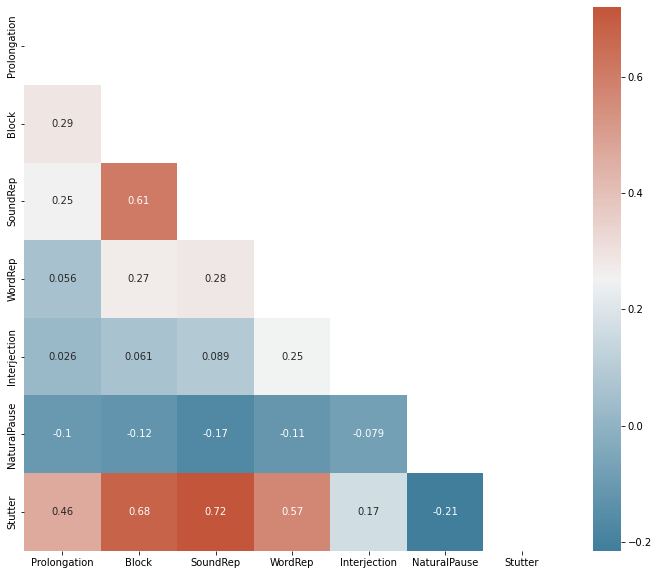

In [52]:
final_df.columns = ['Prolongation','Block','SoundRep','WordRep','Interjection','NaturalPause','Stutter']

# Correlation between different variables
corr = final_df.corr()

# Set up the matplotlib plot configuration
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
import seaborn as sns
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

From the last 6 boxes in the heat map,

- We can see that the variables `Prolongation`, `Block`, `SoundRep` & `WordRep` are strongly correlated with `Stutter` which stores data on the correct labelling of stuttered words. 

- The variables `Interjection` & `NaturalPause` have little to negative correlation with `Stutter`.

**MACHINE LEARNING**

In [53]:
feature_names = ['Prolongation','Block','SoundRep','WordRep','Interjection','NaturalPause']
X = final_df[feature_names]
y = final_df['Stutter']

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) #70% train data & 30% test data

In [55]:
print(X_train, X_test, y_train, y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

      Prolongation  Block  SoundRep  WordRep  Interjection  NaturalPause
869              0      0         0        0             0             0
1200             0      1         1        0             0             0
4070             0      0         0        0             0             0
2861             0      0         0        0             0             1
61               0      0         0        0             0             0
...            ...    ...       ...      ...           ...           ...
2741             0      0         0        0             0             0
1260             0      0         0        0             1             0
1386             0      0         1        1             1             0
2622             0      0         0        0             0             1
4124             1      0         0        1             0             0

[1835 rows x 6 columns]       Prolongation  Block  SoundRep  WordRep  Interjection  NaturalPause
3961             1      0 

Using, `LogisticRegression` as it is always advisable to use the simplest binary classification model and increase model complexity if better prediction models are required.

In [56]:
feature_names = ['Prolongation','Block','SoundRep','WordRep','Interjection','NaturalPause']
X = final_df[feature_names]
y = final_df['Stutter']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) #70% train data & 30% test data

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression().fit(X_train, y_train)
predictions = model.predict(X_test)
model_accuracy = accuracy_score(y_test, predictions)

print('Accuracy of the model on test data: {:.2f}'.format(model_accuracy))

Accuracy of the model on test data: 0.99
